<a href="https://colab.research.google.com/github/bala1802/AppliedTimeSeriesAnalysisWithPython/blob/main/Session-10/Session10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Session10/modular

/content/drive/MyDrive/Session10/modular


# Clone Modular

In [17]:
!git clone "https://github.com/bala1802/modular.git"

In [4]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [5]:
cd /content/drive/MyDrive/Session10

/content/drive/MyDrive/Session10


# Libraries

In [6]:
!pip install -r /content/drive/MyDrive/Session10/modular/requirements.txt -q

In [7]:
import torch
from torchsummary import summary

# CUDA

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


# Model Construction

In [9]:
from modular import custom_resnet

model_01 = custom_resnet.CustomResNet01().to(device)
summary(model_01, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 34, 34]           8,192
       BatchNorm2d-5          [-1, 128, 34, 34]             256
              ReLU-6          [-1, 128, 34, 34]               0
         MaxPool2d-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

# Data Utils

In [10]:
from modular import datautils

CUDA Available? True


In [11]:
train_data = datautils.load_data(mode="train",
                                 transform=datautils.get_transforms(mode="train"))
test_data = datautils.load_data(mode="test",
                                transform=datautils.get_transforms(mode="test"))

len(train_data), len(test_data)

Files already downloaded and verified
Files already downloaded and verified


(50000, 10000)

In [12]:
train_loader = datautils.construct_loader(data=train_data)
test_loader = datautils.construct_loader(data=test_data)

len(train_loader), len(test_loader)

(98, 20)

# Model Utils

In [13]:
from modular import modelutils

# optimizer = modelutils.construct_optimizer(model=model_01, learning_rate=0.01, weight_decay=0.9)
# optimizer = modelutils.construct_optimizer(model=model_01, learning_rate=0.001, weight_decay=0.9)
# optimizer = modelutils.construct_optimizer(model=model_01, learning_rate=0.03, weight_decay=1e-4)
optimizer = modelutils.construct_optimizer(model=model_01)
criterion = modelutils.construct_cross_entropy_loss()

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## LR Finder

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.09E-01


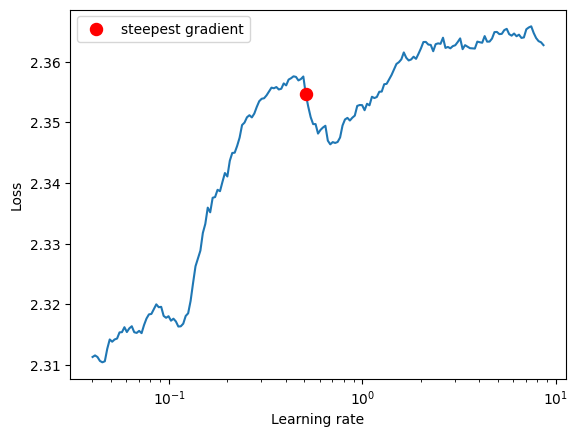

In [14]:
lr_finder = modelutils.construct_LR_finder(model=model_01,
                               optimizer=optimizer,
                               criterion=criterion,
                               device=modelutils.get_device(),
                               dataloader=train_loader,
                               end_learning_rate=10,
                               number_of_iterations=200,
                               step_mode="exp")
lr_finder.plot()
lr_finder.reset()

## LR Scheduler

In [15]:
EPOCHS=24

scheduler = modelutils.construct_scheduler(optimizer=optimizer,
                    data_loader=train_loader,
                    epochs=EPOCHS,
                    maximum_learning_rate=5.09E-01)

# Model Training and Testing

In [16]:
from modular import train
from modular import test

for epoch in range(EPOCHS):
  print("EPOCH: ", epoch)
  train.train(model=model_01, device=modelutils.get_device(), train_loader=train_loader,
        optimizer=optimizer, scheduler=scheduler, epoch=epoch, loss_function=criterion)
  test.test(model=model_01, device=modelutils.get_device(), test_loader=test_loader, loss_function=criterion)

EPOCH:  0


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Loss=2.1385083198547363 Batch_id=97 Accuracy=30.64: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]



Test set: Average loss: 0.0043, Accuracy: 3240/10000 (32.40%)

EPOCH:  1


Loss=2.0889039039611816 Batch_id=97 Accuracy=34.60: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]



Test set: Average loss: 0.0043, Accuracy: 3288/10000 (32.88%)

EPOCH:  2


Loss=2.049351215362549 Batch_id=97 Accuracy=39.27: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]



Test set: Average loss: 0.0041, Accuracy: 4025/10000 (40.25%)

EPOCH:  3


Loss=1.955169677734375 Batch_id=97 Accuracy=45.76: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]



Test set: Average loss: 0.0040, Accuracy: 4790/10000 (47.90%)

EPOCH:  4


Loss=1.9193265438079834 Batch_id=97 Accuracy=49.15: 100%|██████████| 98/98 [00:33<00:00,  2.97it/s]



Test set: Average loss: 0.0040, Accuracy: 4551/10000 (45.51%)

EPOCH:  5


Loss=1.889551043510437 Batch_id=97 Accuracy=55.74: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]



Test set: Average loss: 0.0041, Accuracy: 3885/10000 (38.85%)

EPOCH:  6


Loss=1.8489975929260254 Batch_id=97 Accuracy=57.38: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]



Test set: Average loss: 0.0039, Accuracy: 5029/10000 (50.29%)

EPOCH:  7


Loss=1.8789222240447998 Batch_id=97 Accuracy=59.11: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]



Test set: Average loss: 0.0040, Accuracy: 4664/10000 (46.64%)

EPOCH:  8


Loss=1.8439327478408813 Batch_id=97 Accuracy=61.42: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]



Test set: Average loss: 0.0038, Accuracy: 5821/10000 (58.21%)

EPOCH:  9


Loss=1.7980194091796875 Batch_id=97 Accuracy=64.06: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]



Test set: Average loss: 0.0038, Accuracy: 5781/10000 (57.81%)

EPOCH:  10


Loss=1.8128482103347778 Batch_id=97 Accuracy=65.78: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]



Test set: Average loss: 0.0038, Accuracy: 5338/10000 (53.38%)

EPOCH:  11


Loss=1.8013399839401245 Batch_id=97 Accuracy=66.59: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 0.0036, Accuracy: 6443/10000 (64.43%)

EPOCH:  12


Loss=1.758143424987793 Batch_id=97 Accuracy=66.97: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 0.0036, Accuracy: 6535/10000 (65.35%)

EPOCH:  13


Loss=1.75863778591156 Batch_id=97 Accuracy=68.16: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]



Test set: Average loss: 0.0038, Accuracy: 5760/10000 (57.60%)

EPOCH:  14


Loss=1.7691386938095093 Batch_id=97 Accuracy=68.64: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 0.0036, Accuracy: 6690/10000 (66.90%)

EPOCH:  15


Loss=1.798166036605835 Batch_id=97 Accuracy=69.29: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]



Test set: Average loss: 0.0036, Accuracy: 6756/10000 (67.56%)

EPOCH:  16


Loss=1.7272664308547974 Batch_id=97 Accuracy=69.82: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 0.0036, Accuracy: 6645/10000 (66.45%)

EPOCH:  17


Loss=1.7320806980133057 Batch_id=97 Accuracy=70.31: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]



Test set: Average loss: 0.0036, Accuracy: 6358/10000 (63.58%)

EPOCH:  18


Loss=1.7506853342056274 Batch_id=97 Accuracy=70.69: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]



Test set: Average loss: 0.0036, Accuracy: 6707/10000 (67.07%)

EPOCH:  19


Loss=1.7700480222702026 Batch_id=97 Accuracy=70.90: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 0.0036, Accuracy: 6740/10000 (67.40%)

EPOCH:  20


Loss=1.773421287536621 Batch_id=97 Accuracy=70.99: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]



Test set: Average loss: 0.0037, Accuracy: 6284/10000 (62.84%)

EPOCH:  21


Loss=1.7394086122512817 Batch_id=97 Accuracy=71.43: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 0.0036, Accuracy: 6483/10000 (64.83%)

EPOCH:  22


Loss=1.7322801351547241 Batch_id=97 Accuracy=72.01: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 0.0036, Accuracy: 6758/10000 (67.58%)

EPOCH:  23


Loss=1.7467079162597656 Batch_id=97 Accuracy=71.49: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]



Test set: Average loss: 0.0036, Accuracy: 6714/10000 (67.14%)

